# Using Open Source Models

Create a Hugging face token:
https://huggingface.co/docs/hub/security-tokens

In [ ]:
import torch
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from transformers.utils.logging import disable_progress_bar

from huggingface_hub import login

import warnings
warnings.filterwarnings("ignore")

In [ ]:
my_token_here = "your hf token here"
login(token=my_token_here) # User_Access_Token

### Installations

In [2]:
!pip install --quiet -U bitsandbytes

### Model Configuration

**Configuring and Loading Mistral-7B Instruct with BitsAndBytes for Efficiency**

GREAT 😉 you are ready to configure & load the MODEL. <u>The Code Overview</u>:
1. <u>BitsAndBytesConfig: </u> Sets up 4-bit quantization to minimize model size and memory usage.
2. <u>Model Loading:</u> Loads `Mistral-7B model` with configured quantization settings, for optimized performance.
3. <u>Tokenizer Initialization:</u> Sets up the tokenizer with appropriate padding for consistent input processing.

But first, to use `Mistral model`, <font color="darkorange"> visit its Hugging Face page and accept the terms </font> to access the model files [here](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1).

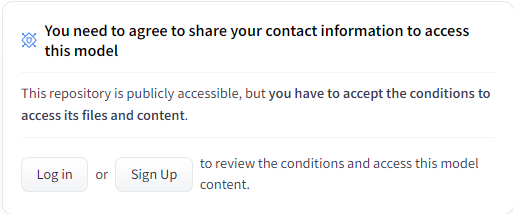


In [ ]:
disable_progress_bar()
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Shows the name of the GPU

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=False,
)

try:
    model = AutoModelForCausalLM.from_pretrained(
        "mistralai/Mistral-7B-Instruct-v0.1",
        quantization_config = bnb_config,
        do_sample = True, # True is better for chatbots or dialogue systems, sampling can make responses feel more natural and less robotic.
        )
    
    print(f"Model loaded successfully :)")
except Exception as e:
    print("Error loading model:", e)

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")
tokenizer.pad_token = tokenizer.eos_token  # Ensure padding uses EOS token
tokenizer.padding_side = "right"           # Add padding to the end of the input

If the following error apears:

> Error loading model: Using bitsandbytes 4-bit quantization requires the latest version of bitsandbytes: pip install -U bitsandbytes

Then: go to Runtime > restart session, and run sells skipping this cell:

```
%%capture
!pip install -U bitsandbytes
```





### Lets Try Mistral-7B-Instruct-v0.1

In [ ]:
prompt = """hi what is your name?"""


inputs = tokenizer(prompt, return_tensors="pt").to("cuda") # Move input tensors to the GPU
output_tokens = model.generate(
    inputs["input_ids"],
    max_new_tokens=100,  # Define maximum length for the response
    temperature=0.7,     # Sampling temperature
    top_p=0.9,           # Nucleus sampling
    do_sample=True       # Ensure response variability
)
response = tokenizer.decode(output_tokens[0], skip_special_tokens=True)

print(f"\033[31mPrompt: {prompt}\033[0m")
print("")
print(f"\033[34mResponse:{response}\033[0m ")

### Now - Choose a Different Model from Hugging Face Library